## RNN - Frozen Dessert Monthly Sales Forecasting with LSTM
-----
## Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N

Units: Index 2012=100, Not Seasonally Adjusted

Frequency: Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation: Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Data\data tensorflow\Frozen_Dessert_Production.csv', index_col= 'DATE', parse_dates = True)

In [3]:
df

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632


In [4]:
df.columns = ['Product']

In [5]:
df.head()

,Product
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Product,573.0,109.895545,27.950571,58.6598,88.9355,107.643,128.2777,196.1737


In [8]:
plt.style.use(['science','notebook','grid'])

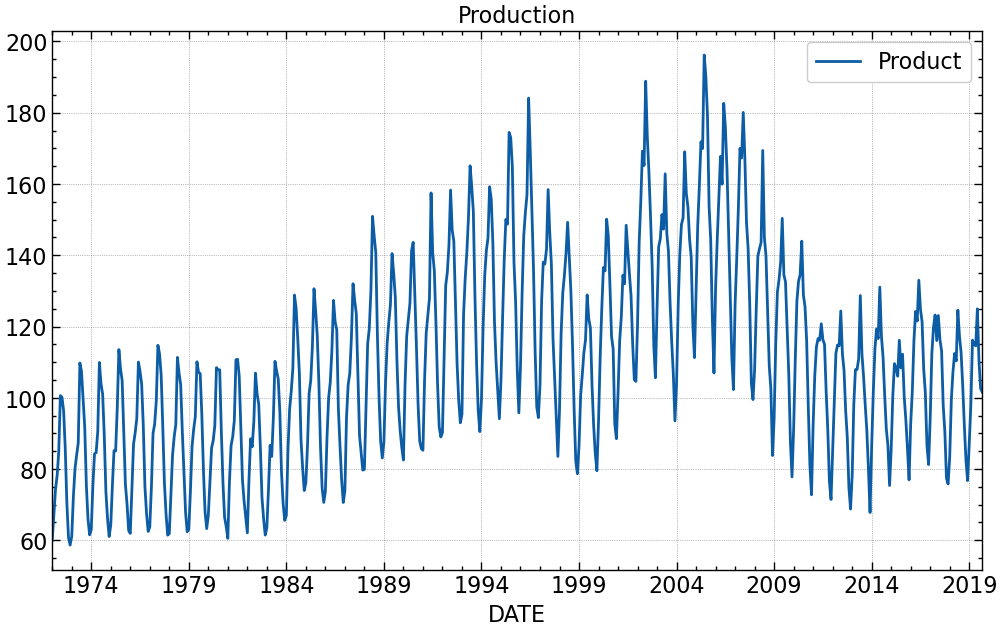

In [9]:
df.plot(figsize=(12, 7), title='Production');

## Train test split

- mengambil data testing selama 1,5 tahun atau 18 bulan

In [10]:
len(df)

573

In [11]:
test_point = 18

In [12]:
test_index = len(df)-test_point
test_index

555

In [13]:
train = df.iloc[:test_index]

In [14]:
test = df.iloc[test_index:]

In [15]:
train

,Product
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2017-11-01,77.4378
2017-12-01,75.8118
2018-01-01,83.4343


In [16]:
test

,Product
DATE,
2018-04-01,112.4309
2018-05-01,110.3544
2018-06-01,124.5841
2018-07-01,117.2215
2018-08-01,112.6779
2018-09-01,103.3118
2018-10-01,92.1321
2018-11-01,82.4347
2018-12-01,76.7608


In [17]:
train.shape, test.shape

((555, 1), (18, 1))

---
---
## Scaler data

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
scaler_train = scaler.fit_transform(train)

In [21]:
scaler_test = scaler.transform(test)

----
----
## Timeseries Generator

In [22]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [23]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module keras.src.preprocessing.sequence:

class TimeseriesGenerator(keras.src.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  
 |  Deprecated: `tf.keras.preprocessing.sequence.TimeseriesGenerator` does not
 |  operate on tensors and is not recommended for new code. Prefer using a
 |  `tf.data.Dataset` which provides a more efficient and flexible mechanism for
 |  batching, shuffling, and windowing input. See the
 |  [tf.data guide](https://www.tensorflow.org/guide/data) for more details.
 |  
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  
 |  Arguments:
 |      data: Indexable generator (su

In [24]:
# # mendefiniskan 12 bulan sebelumya untuk mendapatkan prediksi bulan berikutnya
length = 12
generator = TimeseriesGenerator(scaler_train, scaler_train, length= length, batch_size=1)

In [25]:
# menampilkan batch pertama
X, y = generator[0]

In [26]:
print(f'Given the array : {X.flatten()} \n')
print(f'Predict y : {y}')

Given the array : [0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.        ] 

Predict y : [[0.01774221]]


---
----
## Create Model LSTM

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [28]:
n_features = scaler_train.shape[1]
n_features

1

In [29]:
model = Sequential()

# LSTM layers
model.add(LSTM(100, input_shape = (length, n_features), activation ='relu'))

# output layers
model.add(Dense(1))

# compile model
model.compile(loss='mse', optimizer='adam')

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Add Earlystopping and Validation Generator

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
ealy_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1 )

In [33]:
# validation generator
validation_generator = TimeseriesGenerator(scaler_test, scaler_test, length=length, batch_size=1)

---
---
## Fitting Model Generator

In [34]:
model.fit(generator, epochs =20,
          validation_data = validation_generator, 
          callbacks =[ealy_stop], 
          verbose = 1
         )

Epoch 1/20
543/543 [==============================] - 13s 11ms/step - loss: 0.0201 - val_loss: 0.0103
Epoch 2/20
543/543 [==============================] - 5s 9ms/step - loss: 0.0079 - val_loss: 0.0018
Epoch 3/20
543/543 [==============================] - 7s 12ms/step - loss: 0.0051 - val_loss: 0.0015
Epoch 4/20
543/543 [==============================] - 6s 12ms/step - loss: 0.0053 - val_loss: 0.0015
Epoch 5/20
543/543 [==============================] - 6s 12ms/step - loss: 0.0047 - val_loss: 0.0019
Epoch 6/20
543/543 [==============================] - 6s 11ms/step - loss: 0.0042 - val_loss: 0.0013
Epoch 7/20
543/543 [==============================] - 6s 11ms/step - loss: 0.0042 - val_loss: 0.0024
Epoch 8/20
543/543 [==============================] - 5s 10ms/step - loss: 0.0036 - val_loss: 0.0031
Epoch 8: early stopping


In [35]:
losses = pd.DataFrame(model.history.history)

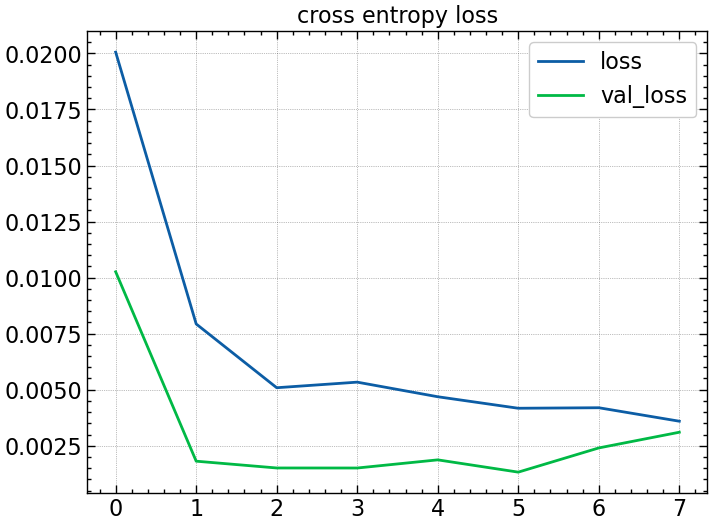

In [36]:
losses.plot(title='cross entropy loss');

------
## Evaluation on data test

In [37]:
test_prediction = []
first_evaluation_batch = scaler_train[-length:]
current_batch = first_evaluation_batch.reshape((1, length, n_features))

for i in range(len(test)):
    # predict current
    current_pred  = model.predict(current_batch)[0]
    # store predict
    test_prediction.append(current_pred)
    
    # update batch | predict | drop first values
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

1/1 [==============================] - 0s 45ms/step


---------
-----
## Inverse transform and compire

In [38]:
true_prediction = scaler.inverse_transform(test_prediction)

In [39]:
true_prediction

array([[117.28103559],
       [122.41798697],
       [125.58749524],
       [124.27683507],
       [117.08506626],
       [100.82774249],
       [ 87.13767313],
       [ 76.26325416],
       [ 73.85015686],
       [ 81.58108313],
       [ 94.69940792],
       [106.3471902 ],
       [116.76785069],
       [124.6593355 ],
       [129.32444495],
       [129.34850977],
       [122.03283907],
       [104.08382185]])

In [40]:
test['Prediction'] = true_prediction

C:\Users\ibrahim\AppData\Local\Temp\ipykernel_728\249045001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Prediction'] = true_prediction


In [41]:
test

,Product,Prediction
DATE,,
2018-04-01,112.4309,117.281036
2018-05-01,110.3544,122.417987
2018-06-01,124.5841,125.587495
2018-07-01,117.2215,124.276835
2018-08-01,112.6779,117.085066
2018-09-01,103.3118,100.827742
2018-10-01,92.1321,87.137673
2018-11-01,82.4347,76.263254
2018-12-01,76.7608,73.850157


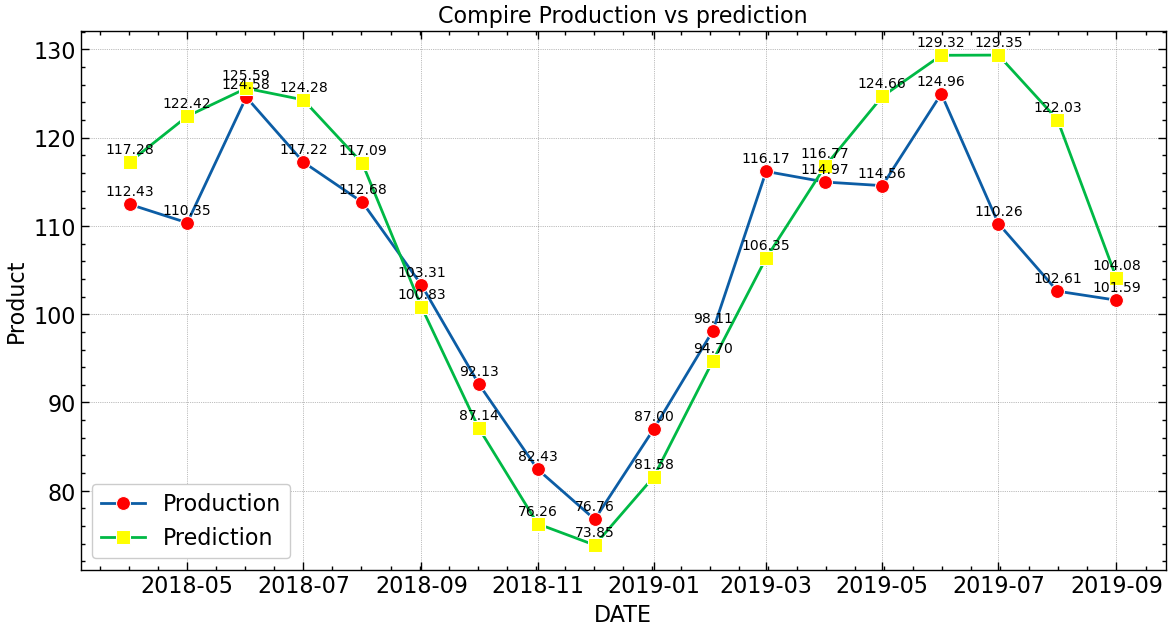

In [42]:
plt.figure(figsize=(14, 7), dpi=100)
sns.lineplot(x=test.index, y='Product', data=test, marker='o', markersize=10, markerfacecolor='red', label='Production')

for x,y in zip(test.index, test['Product']):
    plt.text(x=x,
             y = y + 1, 
             s ='{:.2f}'.format(y),
             ha ='center')
    
sns.lineplot(x=test.index, y='Prediction', data=test, marker='s', markersize=10, markerfacecolor='yellow', label='Prediction')

for x,y in zip(test.index, test['Prediction']):
    plt.text(x=x,
             y = y + 1, 
             s ='{:.2f}'.format(y),
             ha ='center')
plt.title('Compire Production vs prediction')
plt.show()

## Matrics RMSE

In [43]:
from sklearn.metrics import mean_squared_error

In [44]:
RMSE = np.sqrt(mean_squared_error(test['Product'], test['Prediction']))
RMSE

8.58450914915402

-----
## Retrain and forecast full data

In [45]:
# scaler
scaler_full = MinMaxScaler()

In [46]:
scaler_full_data = scaler_full.fit_transform(df)

In [47]:
# generator
length = 12
full_generator = TimeseriesGenerator(scaler_full_data, scaler_full_data, length=length, batch_size=1)

In [48]:
# model
model = Sequential()

model.add(LSTM(100, input_shape=(length, n_features), activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
model.fit(full_generator, epochs=8, verbose=1)

Epoch 1/8
561/561 [==============================] - 7s 9ms/step - loss: 0.0216
Epoch 2/8
561/561 [==============================] - 5s 9ms/step - loss: 0.0072
Epoch 3/8
561/561 [==============================] - 6s 11ms/step - loss: 0.0068
Epoch 4/8
561/561 [==============================] - 6s 10ms/step - loss: 0.0052
Epoch 5/8
561/561 [==============================] - 5s 9ms/step - loss: 0.0046
Epoch 6/8
561/561 [==============================] - 6s 10ms/step - loss: 0.0041
Epoch 7/8
561/561 [==============================] - 6s 10ms/step - loss: 0.0047
Epoch 8/8
561/561 [==============================] - 6s 10ms/step - loss: 0.0036


In [51]:
losses = pd.DataFrame(model.history.history)

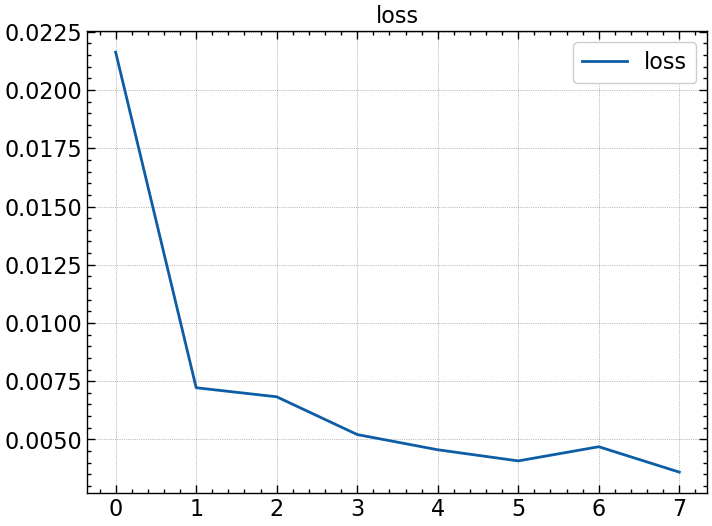

In [52]:
losses.plot(title='loss');

In [53]:
# evaluation on test data

forecast =[]

periods = 12
first_evaluation_batch = scaler_full_data[-length:]
current_batch = first_evaluation_batch.reshape((1, length, n_features))

for i in range(periods):
    # current pred
    current_pred = model.predict(current_batch)[0]
    # store predict
    forecast.append(current_pred)
    # update batch | prediction |  drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

1/1 [==============================] - 0s 61ms/step


In [54]:
forecast = scaler_full.inverse_transform(forecast)

In [55]:
forecast

array([[ 93.60549512],
       [ 85.47211207],
       [ 82.57575515],
       [ 90.37797224],
       [103.76186872],
       [115.60271058],
       [123.05439346],
       [129.22948887],
       [130.54506284],
       [123.37897356],
       [115.8302773 ],
       [108.12794645]])

## Create new stamtamp index

In [56]:
df

,Product
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632


In [57]:
df.tail()

,Product
DATE,
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632
2019-08-01,102.6085
2019-09-01,101.5866


## Pandas frequency string

https://stackoverflow.com/questions/35339139/where-is-the-documentation-on-pandas-freq-tags

https://pandas.pydata.org/docs/user_guide/timeseries.html

`MS` month start frequency

In [58]:
forecast_index = pd.date_range(start='2019-11-01', periods =periods, freq='MS')

In [59]:
forecast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [60]:
forecast_df = pd.DataFrame(data=forecast, index=forecast_index, columns=['forecast'])

In [61]:
forecast_df

,forecast
2019-11-01,93.605495
2019-12-01,85.472112
2020-01-01,82.575755
2020-02-01,90.377972
2020-03-01,103.761869
2020-04-01,115.602711
2020-05-01,123.054393
2020-06-01,129.229489
2020-07-01,130.545063
2020-08-01,123.378974


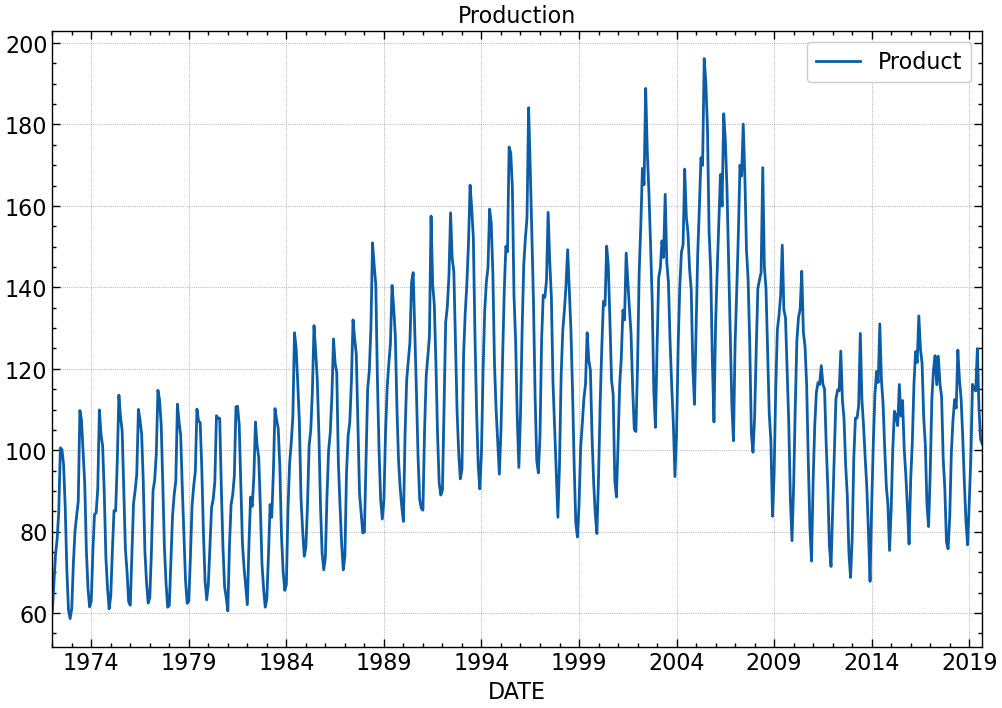

In [62]:
df.plot(figsize=(12, 8), title=('Production'));

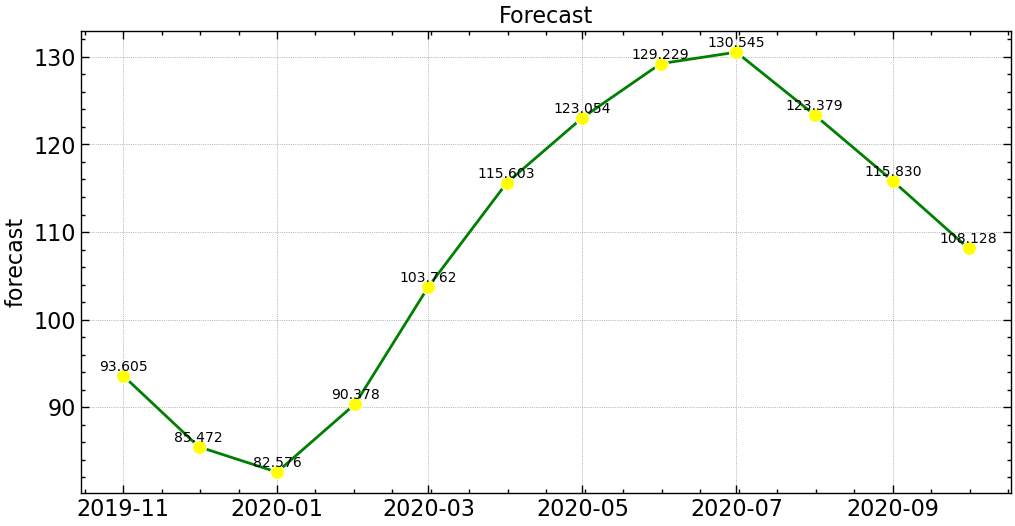

In [63]:
plt.figure(figsize=(12, 6), dpi=100)
sns.lineplot(x=forecast_index, y='forecast', data=forecast_df, marker='o', markerfacecolor='yellow', markersize=10,  color='green' )

for x,y in zip(forecast_index, forecast_df['forecast']):
    plt.text(x= x,
             y= y+0.6 ,
             s='{:.3f}'.format(y),
             ha='center')
plt.title('Forecast') ;

## Join plot

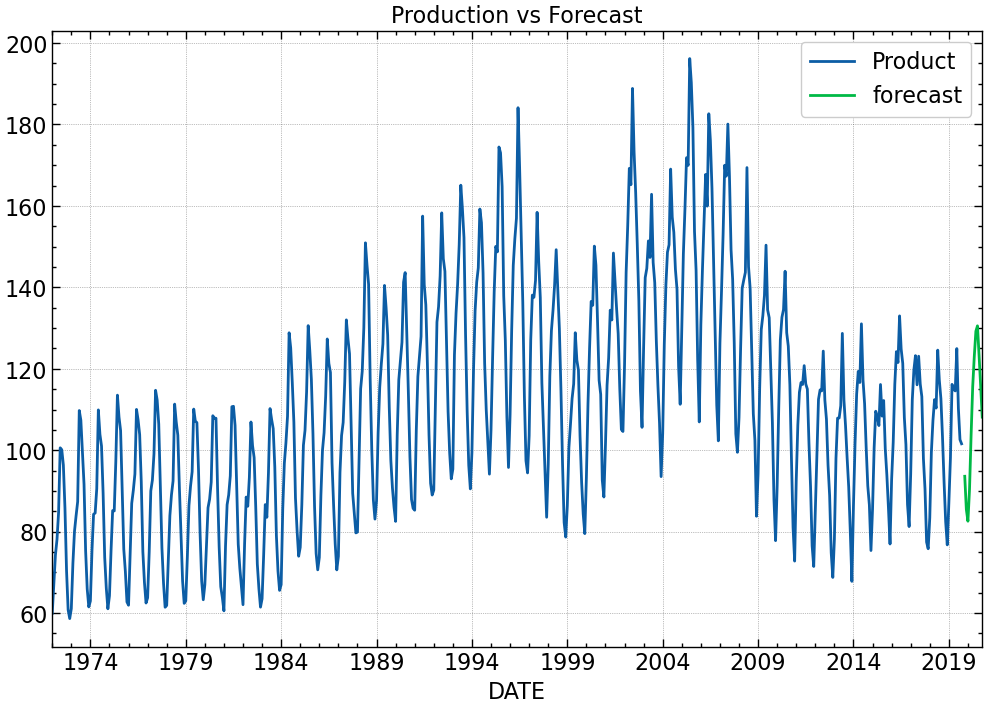

In [64]:
ax = df.plot(figsize=(12, 8))
forecast_df.plot(ax=ax);
plt.title('Production vs Forecast');

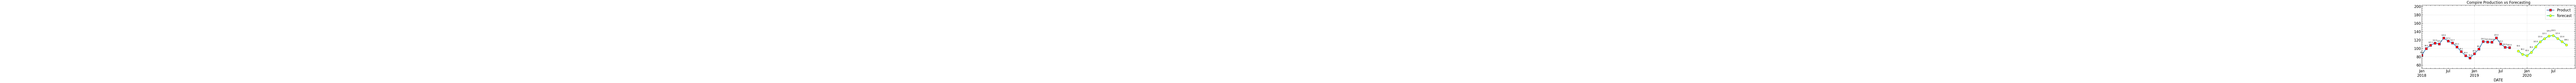

In [65]:
ax = df.plot(figsize=(12, 5), marker='s', markerfacecolor='red', markersize=10)
forecast_df.plot(ax=ax, marker='o', markerfacecolor='yellow', markersize=10);
plt.xlim('2018-01-01', '2020-12-01')

for x,y in zip(df.index, df['Product']):
    label = "{:.1f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', 
                 size=7) 
    
for x,y in zip(forecast_df.index, forecast_df['forecast']):
    label = "{:.1f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,20), # distance from text to points (x,y)
                 ha='center', 
                 size = 7) 
plt.title('Compire Production vs Forecasting')
plt.legend()
plt.savefig('forzen.png');

<img src ='forzen_1.png'>